# Scale Invariant Feature Transform

> Keypoints is a concept you should be aware of when working with images. These are basically the points of interest in an image. Keypoints are analogous to the features of a given image.
They are locations that define what is interesting in the image. Keypoints are important, because no matter how the image is modified (rotation, shrinking, expanding, distortion), we will always find the same keypoints for the image.

> Scale Invariant Feature Transform (SIFT) is a very popular keypoint detection algorithm. It consists of the following steps:
> * Scale-space extrema detection
> * Keypoint localization
> * Orientation assignment
> * Keypoint descriptor
> * Keypoint matching
> * Features extracted from SIFT can be used for applications like image stitching, object detection, etc. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image preparation

In [2]:
img1 = cv2.imread("data/Sagrada_Família_1.jpg")
img2 = cv2.imread("data/Sagrada_Família_2.jpg")

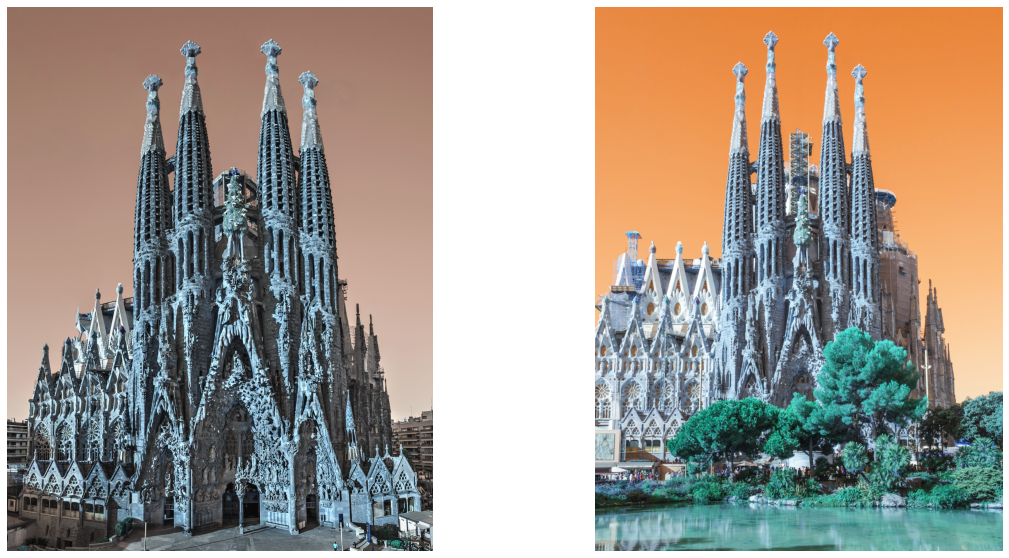

In [3]:
plt.figure(figsize=(19, 10))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')

plt.show()

In [4]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create SIFT objs

In [5]:
sift = cv2.xfeatures2d.SIFT_create()

## Detect keypoints and descriptors

In [6]:
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

In [7]:
with_keypoints1 = cv2.drawKeypoints(gray1, keypoints1, None, (255, 0, 0))
with_keypoints2 = cv2.drawKeypoints(gray2, keypoints2, None, (0, 255, 0))

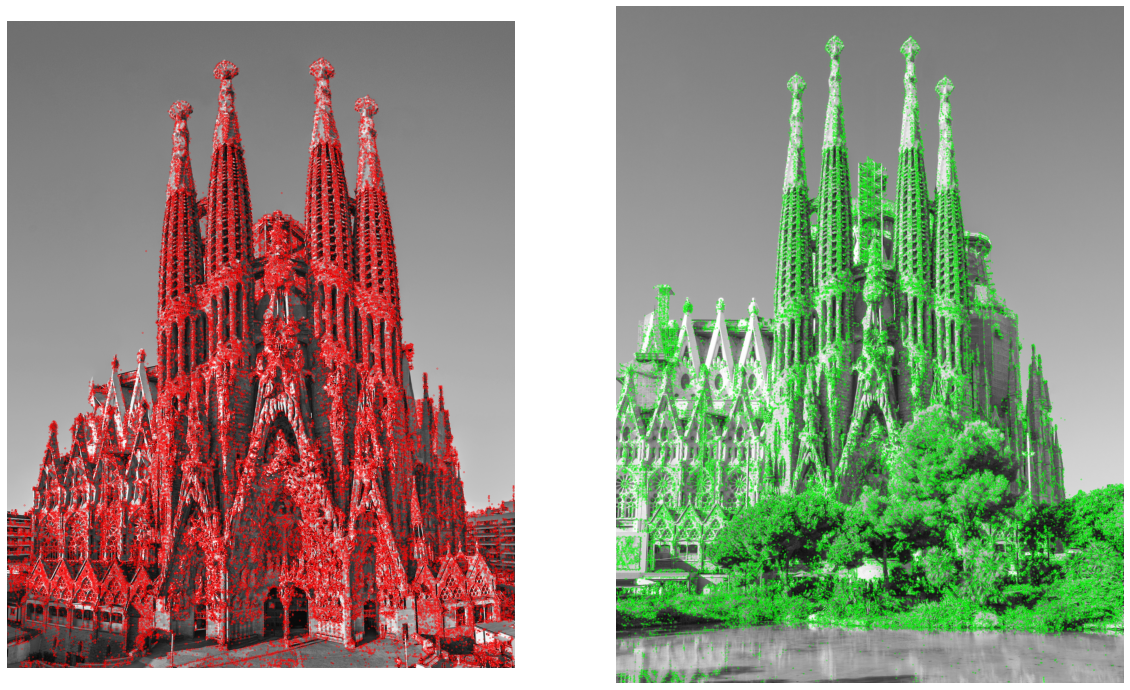

In [8]:
plt.figure(figsize=(20, 16))

plt.subplot(1, 2, 1)
plt.imshow(with_keypoints1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(with_keypoints2)
plt.axis('off')

plt.show()

# Feature matching

In [9]:
print(len(keypoints1), len(keypoints2))

75444 83285


In [10]:
FeatMatch = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = FeatMatch.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

# Results

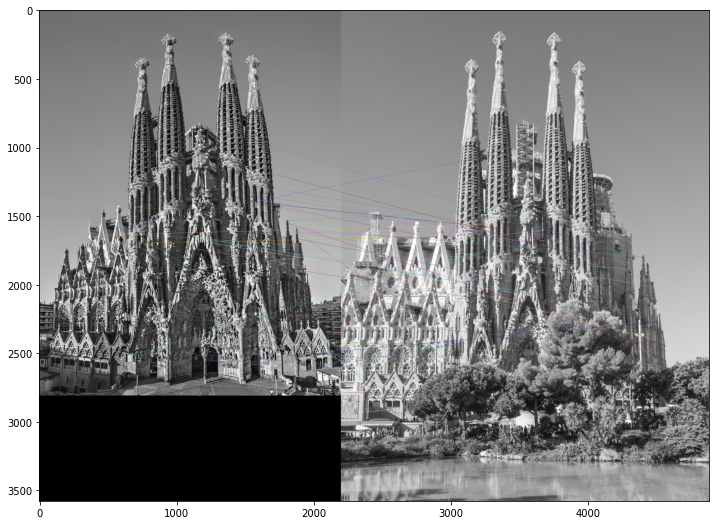

In [11]:
res = cv2.drawMatches(gray1, keypoints1, gray2, keypoints2, matches[:50], 
                      img2, flags=2)

plt.figure(figsize=(12, 12))

plt.imshow(res)
plt.show()